<a href="https://colab.research.google.com/github/chimaobi-okite/Tourism_classification/blob/main/Tourism_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI4D Africa’s Anglophone Research Lab Tanzania Tourism Classification Challenge

## Context

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.

Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

Tanzania’s tourist attractions include the Serengeti plains, which hosts the largest terrestrial mammal migration in the world; the Ngorongoro Crater, the world’s largest intact volcanic caldera and home to the highest density of big game in Africa; Kilimanjaro, Africa’s highest mountain; and the Mafia Island marine park; among many others. The scenery, topography, rich culture and very friendly people provide for excellent cultural tourism, beach holidays, honeymooning, game hunting, historical and archaeological ventures – and certainly the best wildlife photography safaris in the world.

## Objective

The objective of this hackathon is to develop a machine learning model that can classify the range of expenditures a tourist spends in Tanzania. The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.



## Data

### About the Dataset

The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

The dataset is from zindi and canbe accessed [here](https://zindi.africa/competitions/ai4d-lab-tanzania-tourism-classification-challenge/data)

### Reading the dataset

I have stored the data in a github repo for easy access. 

In [1]:
## import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Tourism_classification/main/Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Tourism_classification/main/Test.csv')
var_def = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Tourism_classification/main/VariableDefinitions.csv')
ss = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Tourism_classification/main/SampleSubmission.csv')

In [3]:
train.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [4]:
## see column definition
var_def

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


## Expository Data Analysis(EDA)

In [5]:
## Make a copy of the train data for analysis
train_eda = train.copy()

In [6]:
## see the shape of the dataset
train_eda.shape

(18506, 21)

In [7]:
## get info pertaininging the columns in the dataframe
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

### Missing values check

create a function that checks if there is a missing values in a dataframe and plot the representation via a countplot

In [8]:
def check_missing(data):
  size = data.shape[0]
  missing = data.isnull().sum()[data.isnull().sum() > 0].sort_values()
  if not missing.empty :
    plot_missing(missing, size)
  else:
    print('This dataframe has no missing values')

def plot_missing(data : pd.Series, size):
  plt.style.use('seaborn-darkgrid')
  plt.title('Missing Values Plot')
  ax = data.plot.barh(color = 'green')

  for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/size)*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

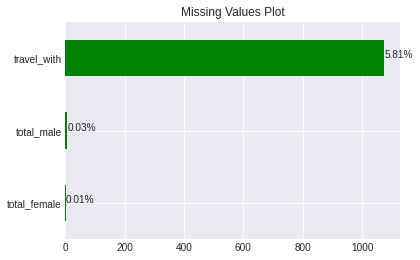

In [9]:
check_missing(train_eda)

### Univariate Analysis

#### country

In [10]:
train_eda['country'].value_counts()

UNITED STATES OF AMERICA    2846
UNITED KINGDOM              2120
ITALY                       1625
FRANCE                      1064
GERMANY                      969
                            ... 
ERITREA                        1
NIGER                          1
ESTONIA                        1
CAPE VERDE                     1
JORDAN                         1
Name: country, Length: 131, dtype: int64

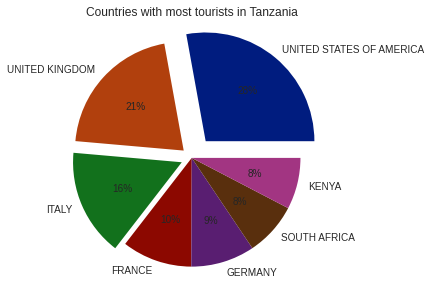

In [11]:
## Lets use a pie chart to represent the top 7 seven countries  Tanzanian tourist came from
data = train_eda['country'].value_counts().values[: 7]
labels = train_eda['country'].value_counts().index[: 7]
plt.figure(figsize= (5,5))
# explode the top 3
explode = [0.2, 0.1, 0.1, 0, 0, 0, 0]
palette_color = sns.color_palette('dark')
plt.pie(data, labels=labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.title('Countries with most tourists in Tanzania')
  
plt.show()

country has alot of values, lets try analyse it on bases of region and subregion. The csv file used here is from kaggle and saved on my github repo for this project

In [12]:
country_df = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Tourism_classification/main/continents2.csv')
country_df  = country_df[['name', 'region', 'sub-region']]
country_df.rename(columns={'name':'country', 'sub-region':'sub_region'}, inplace = True)

country_df.head()

,country,region,sub_region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [13]:
# arrange the two dataframe in a way that it can easily be merged
country_df.country = country_df.country.map(lambda x : x.lower())
train_eda.country = train_eda.country.replace(['UNITED STATES OF AMERICA', 'SWIZERLAND', 'MORROCO', 'DRC',
                                       'UAE','KOREA', 'SWAZILAND', 'PHILIPINES', 'SCOTLAND', 'SAUD ARABIA', 'IVORY COAST', 'COMORO', 'UKRAIN', 'MALT'], ['United States', 'Switzerland', 'Morocco', 'Congo', 'United Arab Emirates', 'Korea, Republic of',
'Eswatini', 'Philippines', 'United Kingdom', 'Saudi Arabia','Côte D\'Ivoire', 'Comoros', 'Ukraine', 'Malta'])
train_eda.country = train_eda.country.map(lambda x : x.lower())

#merge
train_eda = train_eda.merge(country_df,how = 'left')
train_eda.head(3)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,region,sub_region
0,tour_id1hffseyw,italy,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,No,No,No,0,7,Yes,High Cost,Europe,Southern Europe
1,tour_idnacd7zag,united kingdom,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,No,No,No,0,7,Yes,High Cost,Europe,Northern Europe
2,tour_id62vz7e71,united states,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,6,6,Yes,Higher Cost,Americas,Northern America


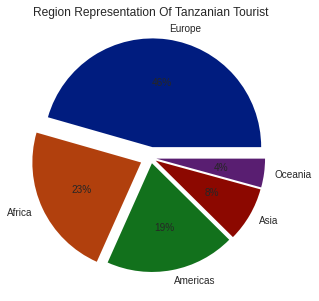

In [14]:
## Lets use a pie chart to represent the region of tanzanian tourist
data = train_eda['region'].value_counts()
labels = train_eda['region'].value_counts().index
plt.figure(figsize= (5,5))
# explode the top 3
explode = [0.1, 0.1, 0.05, 0.05, 0.05]
palette_color = sns.color_palette('dark')
plt.pie(data, labels=labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.title('Region Representation Of Tanzanian Tourist')
  
plt.show()

Tourists Age Group

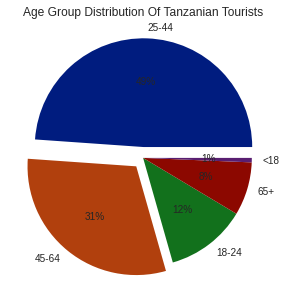

In [15]:
data = train_eda['age_group'].value_counts().values
labels = train_eda['age_group'].value_counts().index
plt.figure(figsize= (5,5))
# explode the top 3
explode = [0.1, 0.1, 0, 0, 0]
palette_color = sns.color_palette('dark')
plt.pie(data, labels=labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')

plt.title('Age Group Distribution Of Tanzanian Tourists')
  
plt.show()

#### Travel With

In [16]:
train_eda['travel_with'].value_counts()

Alone                           7590
With Spouse                     4842
With Other Friends/Relatives    3268
With Spouse and Children        1193
With Children                    538
Name: travel_with, dtype: int64

#### Purpose

In [17]:
train_eda['purpose'].value_counts()

Leisure and Holidays              11755
Visiting Friends and Relatives     2304
Business                           2297
Meetings and Conference            1179
Volunteering                        438
Other                               326
Scientific and Academic             198
Medical                               9
Name: purpose, dtype: int64

#### Main Activity

In [18]:
train_eda['main_activity'].value_counts()

Widlife Tourism             5988
Beach Tourism               4172
Wildlife Tourism            2283
Conference Tourism          1920
Hunting Tourism             1712
Cultural Tourism            1444
Mountain Climbing            529
Business                     280
Bird Tourism                 144
Diving and Sport Fishing      34
Name: main_activity, dtype: int64

#### tour_arrangement

In [19]:
train_eda['tour_arrangement'].value_counts()

Package Tour    9295
Independent     9211
Name: tour_arrangement, dtype: int64

#### Info_Source

In [20]:
train_eda['info_source'].value_counts()

Travel agent, tour operator        8005
Friends, relatives                 6077
Others                             1368
Newspaper, magazines, brochures    1301
Radio, TV, Web                     1223
Trade fair                          243
Tanzania Mission Abroad             197
Inflight magazines                   92
Name: info_source, dtype: int64

#### Target: Cost Category

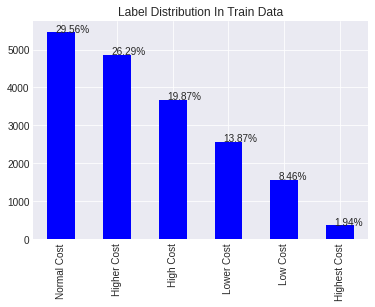

In [21]:
# see the distribution of target variable
ax = train_eda['cost_category'].value_counts().plot.bar(color = 'blue')
size = train_eda.shape[0]
for p in ax.patches:
  height, width, x= p.get_height(), p.get_width(), p.get_x()
  percent = height/size * 100
  label = '{:,.2f}%'.format(percent)
  ax.annotate(label, (x + width*0.3, height))

plt.title('Label Distribution In Train Data')
plt.show()

In [22]:
train_eda['cost_category'].value_counts().index

Index(['Normal Cost', 'Higher Cost', 'High Cost', 'Lower Cost', 'Low Cost',
       'Highest Cost'],
      dtype='object')

### Bivariate And Muiltivariate Analysis

 see the effect of tour arrangement on cost category

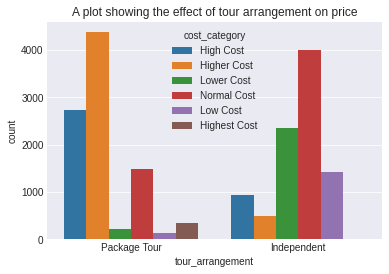

In [23]:
sns.countplot(data = train_eda, x = 'tour_arrangement', hue = 'cost_category')
plt.title('A plot showing the effect of tour arrangement on price')
plt.show()

Lets see the effect of tourist's main activity on price

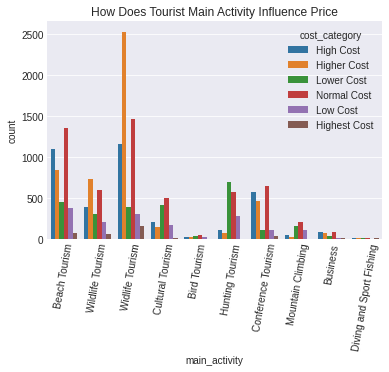

In [24]:
g = sns.countplot(data = train_eda, x = 'main_activity', hue = 'cost_category')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.title('How Does Tourist Main Activity Influence Price')
plt.show()

Lets see the effect of tourist purpose of traveling on price

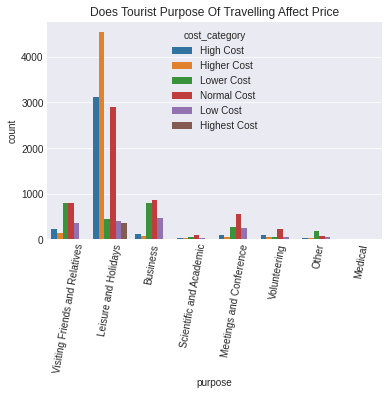

In [25]:
g = sns.countplot(data = train_eda, x = 'purpose', hue = 'cost_category')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.title('Does Tourist Purpose Of Travelling Affect Price')
plt.show()

Doest The Persons a Tourist Travel With have Any Effect On Cost Category?

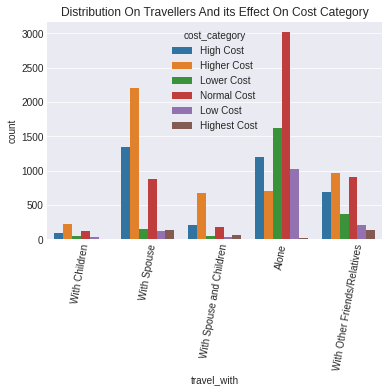

In [26]:
g = sns.countplot(data = train_eda, x = 'travel_with', hue = 'cost_category')
g.set_xticklabels(g.get_xticklabels(),rotation = 80)
plt.title('Distribution On Travellers And its Effect On Cost Category')
plt.show()


Does A Part Age Group Spend Higher Than Others?

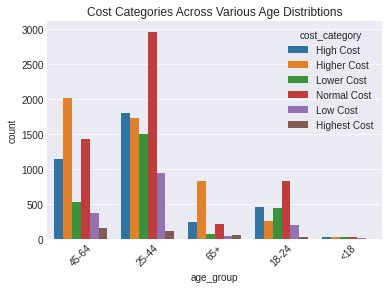

In [27]:
g = sns.countplot(data = train_eda, x = 'age_group', hue = 'cost_category')
g.set_xticklabels(g.get_xticklabels(),rotation = 45)
plt.title('Cost Categories Across Various Age Distribtions')
plt.show()

What influence does the number of nights spent have on cost category

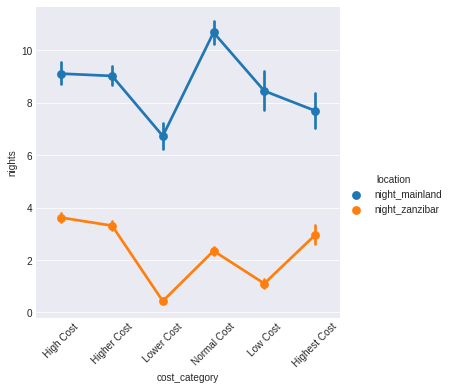

In [28]:
df = train_eda[['cost_category', 'night_mainland', 'night_zanzibar']]
dfm = df.melt('cost_category', var_name='location', value_name='nights')
g = sns.catplot(x='cost_category', y='nights', hue='location', data=dfm, kind='point')
g.set_xticklabels(rotation = 45)
plt.show()

See the cost relationship between first time visitors and subsequent visitors to tanzania

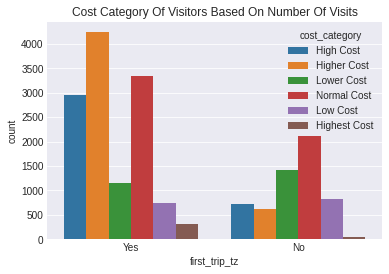

In [29]:
sns.countplot(data = train_eda, x = 'first_trip_tz', hue = 'cost_category')
plt.title('Cost Category Of Visitors Based On Number Of Visits')
plt.show()

What Package Influences Price The Most

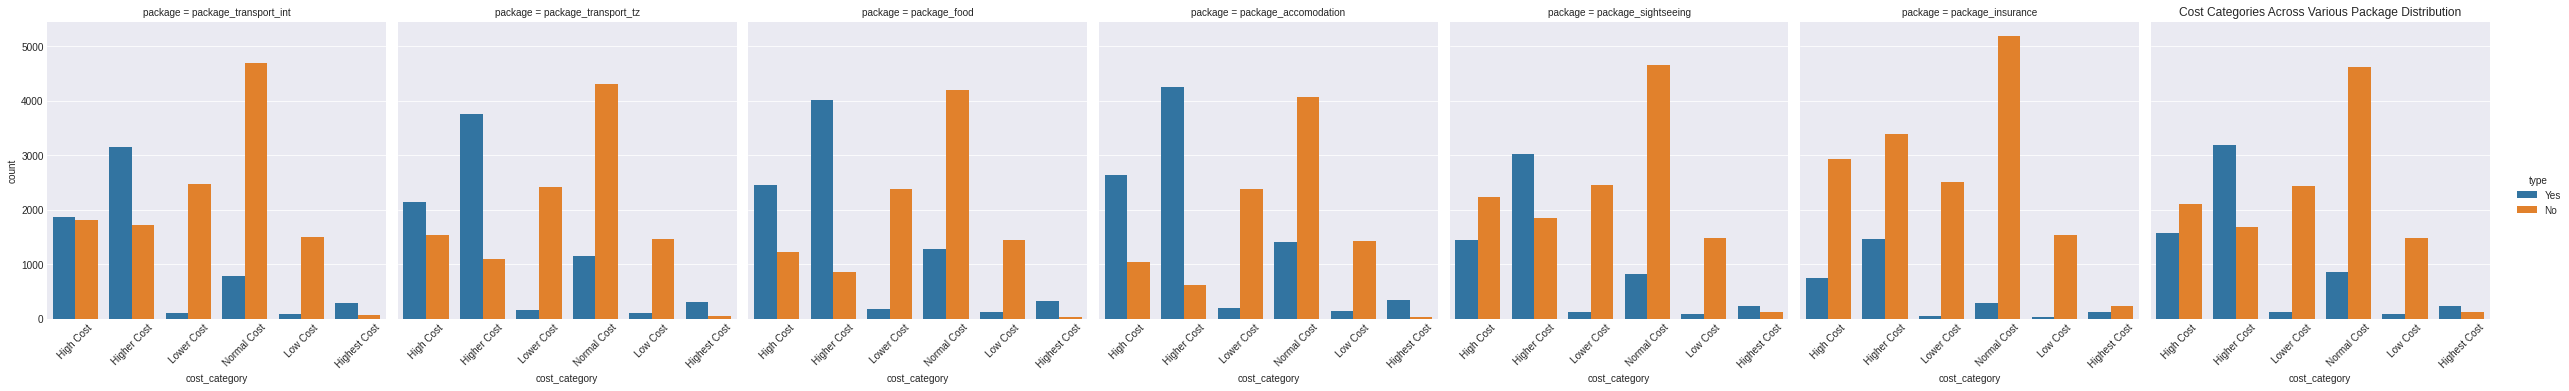

In [30]:
df = train_eda[['cost_category', 'package_transport_int', 'package_transport_tz', 'package_food','package_accomodation','package_sightseeing',
                'package_insurance', 'package_guided_tour']]
dfm = df.melt('cost_category', var_name='package', value_name='type')
g = sns.catplot(x='cost_category', hue='type', data=dfm,col = 'package' ,kind='count')
g.set_xticklabels(rotation = 45)
plt.title('Cost Categories Across Various Package Distribution')
plt.show()

How does cost_category vary across tourists from different countries/regions?

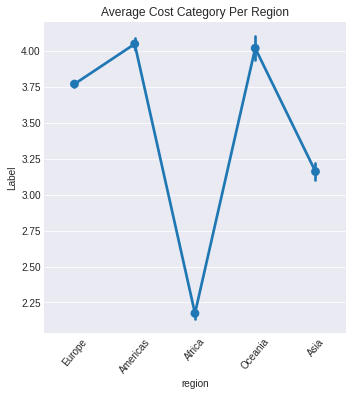

In [31]:
targets = {'Lower Cost':1, 'Low Cost':2, 'Normal Cost':3, 'High Cost': 4,'Higher Cost': 5, 'Highest Cost' : 6}
copy = train_eda.copy()
copy['Label'] = copy['cost_category'].map(targets)
g = sns.catplot(x='region', y='Label',data=copy, kind='point')
g.set_xticklabels(rotation = 50)
plt.title('Average Cost Category Per Region')
plt.show()

### Feature Generation and Analysis

Tanzania has two main regions - mainland and zanzibar. So aggregating the number of nights spent in the two regions will equal the total number nights a tourist spent in tanzania and will have a huge influence on cost category expecially when the tourist is on an independent tour

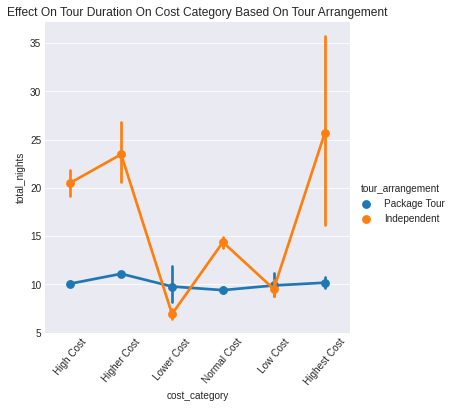

In [32]:
## first make a copy of train eda for this step 
df = train_eda.copy()
df['total_nights'] = df['night_mainland'] + df['night_zanzibar']
g = sns.catplot(x='cost_category', y='total_nights',data=df, kind='point', hue = 'tour_arrangement')
g.set_xticklabels(rotation = 50)
plt.title('Effect On Tour Duration On Cost Category Based On Tour Arrangement')
plt.show()

Create a new columne total_individuals that sums the number of male and females a tourist comes with and see its effect on cost category

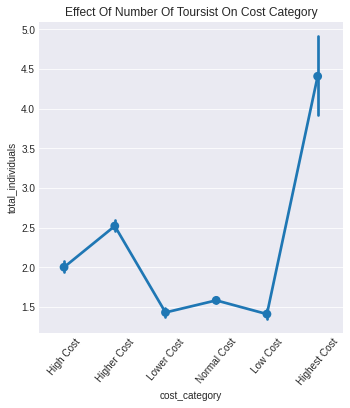

In [33]:
df['total_individuals'] = df['total_female'] + df['total_male']
g = sns.catplot(x='cost_category', y='total_individuals',data=df, kind='point')
g.set_xticklabels(rotation = 50)
plt.title('Effect Of Number Of Toursist On Cost Category')
plt.show()

Aggregate the package columns. The idea here is the the more package a tourist subscribes to, the more he spends

In [34]:
package_cols = ['package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance']

for col in package_cols:
  df[col] = df[col].map(lambda x : 1 if x == 'Yes' else 0)
df.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,region,sub_region,total_nights,total_individuals
0,tour_id1hffseyw,italy,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,0,0,0,7,Yes,High Cost,Europe,Southern Europe,7,2.0
1,tour_idnacd7zag,united kingdom,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,0,0,0,7,Yes,High Cost,Europe,Northern Europe,7,2.0
2,tour_id62vz7e71,united states,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,0,6,6,Yes,Higher Cost,Americas,Northern America,12,2.0
3,tour_idrc76tzix,rwanda,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,0,0,3,0,No,Lower Cost,Africa,Sub-Saharan Africa,3,4.0
4,tour_idn723m0n9,united states,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,1,1,7,0,Yes,Higher Cost,Americas,Northern America,7,1.0


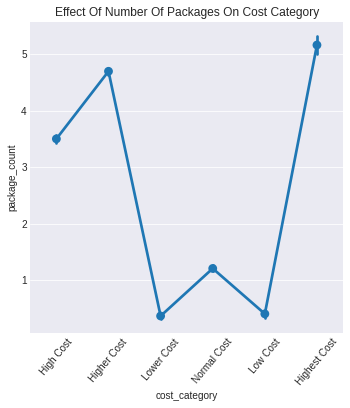

In [35]:
df['package_count'] = df[package_cols].sum(axis = 1)
g = sns.catplot(x='cost_category', y='package_count',data=df, kind='point')
g.set_xticklabels(rotation = 50)
plt.title('Effect Of Number Of Packages On Cost Category')
plt.show()


### Handling Missing Values

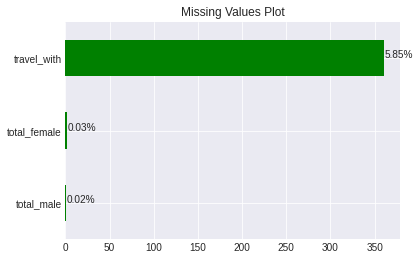

In [36]:
## check for missing values in test set
check_missing(test)

In [37]:
df[df['travel_with'].isnull() & (df['total_female'] + df['total_male']) > 1]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,region,sub_region,total_nights,total_individuals,package_count


In [38]:
df[df['total_male'].isnull()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category,region,sub_region,total_nights,total_individuals,package_count
6195,tour_idcfe5lv3z,south africa,25-44,With Other Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife Tourism,"Newspaper, magazines, brochures",Independent,...,0,4,0,Yes,Normal Cost,Africa,Sub-Saharan Africa,4,NaN,0
7092,tour_idzmkp9sq6,china,25-44,With Other Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,4,2,Yes,Highest Cost,Asia,Eastern Asia,6,NaN,7
9350,tour_idgxm5bafr,spain,45-64,With Other Friends/Relatives,7.0,NaN,Other,Hunting Tourism,"Travel agent, tour operator",Package Tour,...,1,11,0,No,Highest Cost,Europe,Southern Europe,11,NaN,4
9571,tour_idaqxaa6li,france,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,1,6,0,Yes,Normal Cost,Europe,Western Europe,6,NaN,7
13076,tour_id7rzn4czm,germany,45-64,With Other Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,1,23,0,No,Higher Cost,Europe,Western Europe,23,NaN,7
15585,tour_id41dez9e2,netherlands,45-64,With Other Friends/Relatives,11.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,0,5,0,Yes,Higher Cost,Europe,Western Europe,5,NaN,3


Analysis Of The columns with missing values showed that 
1. The best way to fill missing values in travel_with is to fill assume that the tourist travelled alone because as since at points where travel_with is missing the total_individual count never exceeded 1.

2. For filling missing values in total_female, we first check if the travel_with is alone, if yes and the total_male is already 1, total_female should be zero else 1. If not travel alone fill the missing value with 1.0(median value)

3. for filling missing values in total_male, step two above applies

### Summary Of EDA

From the expository data analysis we saw that

- Tanzianian Tourists are mainly from europe, america and africa, with most from the united states.
- top 7 home countries of tourists in Tanzania
- most tanzanian tourists are between 25-44
- Most tourist came for leisure and holidays with only few for medical purposes
- The main activity of tourists are wildlife tourism. We also saw widlife tourism as main activities too. This might have been a mistake which we will incorporate in our modelling
- The target column is cost category which is categorical containing 6 different categories. Therefore this problem will be modelled as a multiclass-classification problem. There is also high data imbalance in the train set.
- Most first time tourists spend more
- Package tourist tend to spend more than independent tourist, infact the probability of finding an independent tourist in the highest cost category is 0.0
- The older Age Group tend to spend more on tourism
- Most tourists spend more time in the mainland. Probably thats where the most tourist attraction center is in tanzania
- Tour duration is highly correlated with cost_category especially for independent tourists
- The more package a package tourist subscribes to, the higher the cost
- The higher the number of persons a tourist comes with the higher the price. 